In [1]:
# Import libraries

# basic libraries
import pandas as pd
import numpy as np
import math

# data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# import seaborn as sns

# working with SQL
import psycopg2
import sqlalchemy as sa
from   sqlalchemy.engine import URL
from   sqlalchemy import text

# working with time series
import matplotlib.dates as mdates
from datetime import date, time, datetime

# statistical computation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# make sure each time the random generation gives the same result
np.random.seed(1234)

In [3]:
constructor_results = pd.read_csv("data_raw/constructor_results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
races=pd.read_csv("data_raw/races.csv")
constructor_standings=pd.read_csv("data_raw/constructor_standings.csv")
results=pd.read_csv("data_raw/results.csv")

In [4]:
races_21=races.query("year >=2000")
#merge data
constructors_merged_1 = pd.merge(constructors,
                         constructor_results,
                         on = "constructorId",
                         how = "inner")

constructors_merged_2=pd.merge(constructors_merged_1,
                       races,
                       on=["raceId"],# how to avoid name and url duplicates
                       how="inner")

constructors_merged=pd.merge(constructors_merged_2,
                              constructor_standings,
                              on=["constructorId","raceId"],
                              how="inner")
constructors_merged.dtypes

#constructors_merged["year"]=constructors_merged["year"].astype(np.int)


constructors_merged_21th= constructors_merged.query("year>=2000").sort_values(by="wins",ascending=False)
constructors_merged_21th

,constructorId,constructorRef,name_x,nationality,url_x,constructorResultsId,raceId,points_x,status,year,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorStandingsId,points_y,position,positionText,wins
9710,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15428,968,43.0,\N,2016,...,\N,\N,\N,\N,\N,26722,765.0,1,1,19
9699,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15417,967,43.0,\N,2016,...,\N,\N,\N,\N,\N,26711,722.0,1,1,18
10936,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,16660,1096,40.0,\N,2022,...,11:00:00,2022-11-19,14:00:00,\N,\N,28402,759.0,1,1,17
9688,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15406,966,43.0,\N,2016,...,\N,\N,\N,\N,\N,26700,679.0,1,1,17
9290,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15005,918,50.0,\N,2014,...,\N,\N,\N,\N,\N,26129,701.0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,3899,8,0.0,\N,2009,...,\N,\N,\N,\N,\N,8665,11.0,7,7,0
3803,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,3902,8,0.0,\N,2009,...,\N,\N,\N,\N,\N,8667,5.0,9,9,0
3804,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,3895,8,6.0,\N,2009,...,\N,\N,\N,\N,\N,8671,26.0,4,4,0
3805,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,3897,8,2.0,\N,2009,...,\N,\N,\N,\N,\N,8664,34.5,3,3,0


In [8]:
# group by nationality
constructors_merged_21th_top10nations = (constructors_merged_21th.groupby(["nationality"])
                                                                 .agg(sum_wins=('wins',sum))
                                                                 .reset_index())
#has no attribute sort values
# tried  .apply(lambda x: x.sort_values(by="wins",ascending=False).iloc[:10]) but is not counting sum as expected
constructors_merged_21th_top10nations

,nationality,sum_wins
0,American,0
1,Austrian,898
2,British,784
3,Dutch,0
4,French,237
5,German,1219
6,Indian,0
7,Irish,14
8,Italian,1169
9,Japanese,6


In [9]:
#group by id

constructors_merged_21th_top10id = (constructors_merged_21th.groupby(["constructorId"])
                                                            .agg(sum_wins=('wins',sum))
                                                            .reset_index())
#has no attribute sort values
# tried  .apply(lambda x: x.sort_values(by="wins",ascending=False).iloc[:10]) but is not counting sum as expected
constructors_merged_21th_top10id

,constructorId,sum_wins
0,1,569
1,2,12
2,3,96
3,4,225
4,5,5
5,6,1154
6,7,0
7,8,0
8,9,898
9,10,0


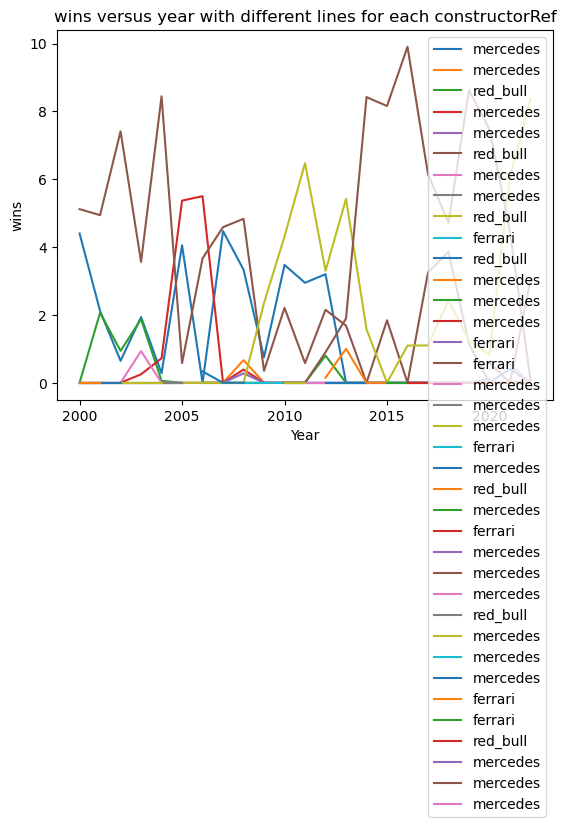

In [16]:
# Create a line plot of "sum wins" versus "year" with different lines for each "constructorId"

graph1=constructors_merged_21th.pivot_table(index="year",columns="constructorId",values="wins").reset_index()
# graph1
# Set labels for x-axis and y-axis

list_columns = list(graph1.columns)
list_columns.remove("year")

for i in list_columns: 
    plt.plot(graph1["year"], graph1[i])

# plt.plot(constructors_merged_21th["year"], constructors_merged_21th["wins"])
plt.xlabel("Year")
plt.ylabel("wins")
plt.legend(constructors_merged_21th["constructorRef"])
plt.title("wins versus year with different lines for each constructorRef")

# Set legend labels to unique "constructorId" values
#plt.legend(constructors_merged_agg['constructorRef'].unique())

# Display the plot
plt.show()

In [ ]:
# switch the code for nationality 



In [ ]:
# search how to get world map 